In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.13.0-rc1


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/Users/akshay/Documents/project/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
for i in labels:
    folderPath = os.path.join('/Users/akshay/Documents/project/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [3]:
print(X_train)

[[[[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 2  2  2]
   [ 2  2  2]
   [ 2  2  2]]

  ...

  [[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 2  2  2]
   [ 2  2  2]
   [ 2  2  2]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]]


 [[[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  ...

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 

In [4]:
print(Y_train)

['glioma_tumor' 'glioma_tumor' 'glioma_tumor' ... 'pituitary_tumor'
 'pituitary_tumor' 'pituitary_tumor']


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [6]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

2611
653
2611
653


In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
cnn=tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(150,150,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [18]:
# cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
cnn.fit(X_train,y_train,epochs=30)

Epoch 1/5
82/82 [==============================] - 10s 117ms/step - loss: 0.0764 - accuracy: 0.9782
Epoch 2/5
82/82 [==============================] - 10s 118ms/step - loss: 0.0612 - accuracy: 0.9805
Epoch 3/5
82/82 [==============================] - 9s 113ms/step - loss: 0.0542 - accuracy: 0.9835
Epoch 4/5
82/82 [==============================] - 9s 114ms/step - loss: 0.0226 - accuracy: 0.9927
Epoch 5/5
82/82 [==============================] - 9s 114ms/step - loss: 0.0725 - accuracy: 0.9789


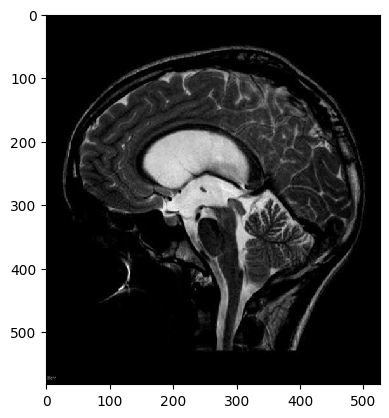

In [20]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
# from tensorflow.keras.preprocessing import image
img = image.load_img('/Users/akshay/Documents/project/Testing/glioma_tumor/image(47).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [21]:
img = cv2.imread('/Users/akshay/Documents/project/Testing/glioma_tumor/image(47).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)

In [22]:
a=cnn.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

1/1 [==============================] - 0s 56ms/step
glioma_tumor


In [23]:
Y_pred=cnn.predict(X_test)

21/21 [==============================] - 1s 37ms/step


In [24]:
loss, acc = cnn.evaluate(x=X_test, y=y_test)
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

21/21 [==============================] - 1s 38ms/step - loss: 0.8101 - accuracy: 0.8560
Test Loss = 0.8101240992546082
Test Accuracy = 0.8560490012168884


In [25]:
import joblib
joblib.dump(cnn,'brain_model.sav')

['brain_model.sav']